In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from wrangle import acquire_wine, wrangle_wine
from vis import quality_distribution, alcohol_distribution, alcohol_vs_quanity, density_vs_quantity, v_acidity_vs_quantity
from explore import spearmanr_test, data_pipeline
from model import eval_baseline, train_model

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor


#set display peferences
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

In [2]:
train, val, test = wrangle_wine()

In [3]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
3761,9.9,0.490,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,9.400000,6,white
3740,7.7,0.280,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,9.600000,5,white
1359,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,6,red
1230,7.7,0.180,0.34,2.7,0.066,15.0,58.0,0.99470,3.37,0.78,11.800000,6,red
4751,7.6,0.250,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,13.100000,6,white


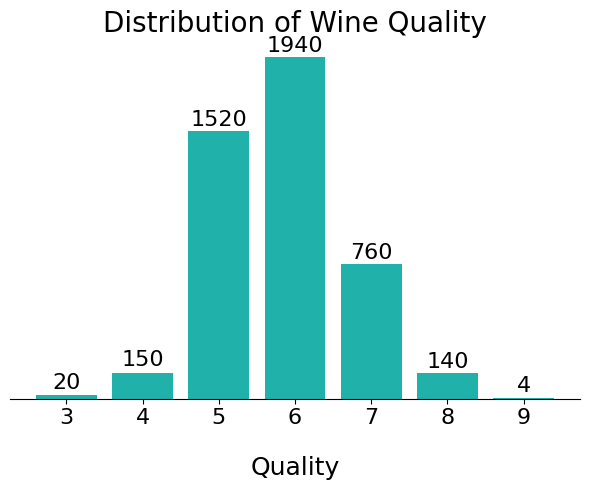

In [4]:
quality_distribution(train)

___
## #1 Alcohol
___

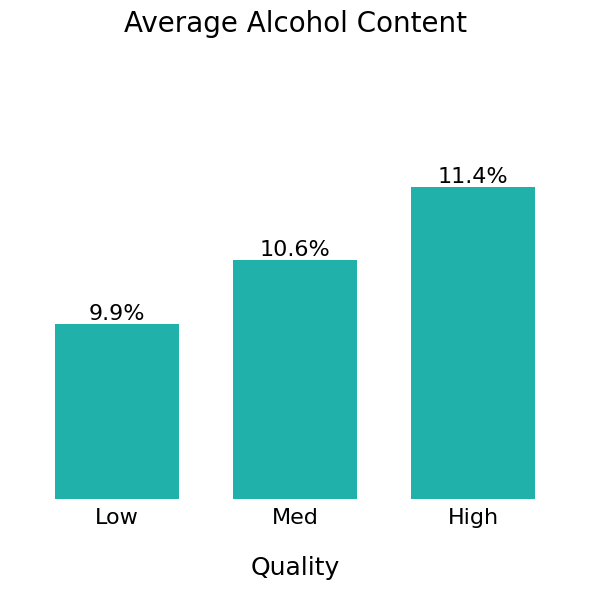

In [5]:
alcohol_vs_quanity(train)

<font size="4"> **Hypothesis 1: Alcohol Content Impact**</font>
   <font size="3"> 
   
   - *Question:* `Does the Alcohol content impact wine Quality?`
   
   </font>

<font size="3"> H0: There is no statistically significant monotonic relationship between the quality of the wine and the alcohol content.</font>

<font size="3">Ha: There is a statistically significant monotonic relationship between the quality of the wine and the alcohol content.</font>

In [6]:
spearmanr_test(train,'alcohol')

There is a statistically significant Spearman's rank correlation (p-value = 0.0000, corr = 0.4471).


<font size="5">We `REJECT` the null hypothesis</font><br>
<font size="4">`There is a relationship` between the `Quality` of the wine and the `Alcohol` content.</font>

___
## #2 Density
___

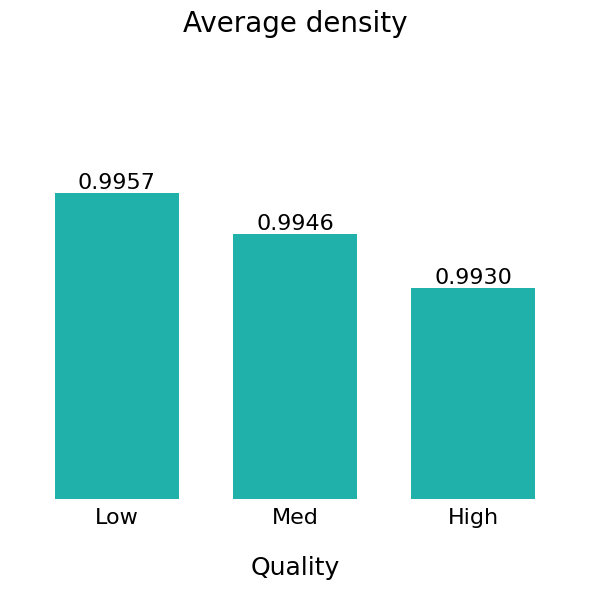

In [7]:
density_vs_quantity(train)

<font size="4"> **Hypothesis 2: Density Impact**</font>
   <font size="3"> 
   
   - *Question:* `Does the Density impact wine Quality?`
   </font>

H0: There is no statistically significant monotonic relationship between the quality of the wine and the density.

Ha: There is a statistically significant monotonic relationship between the quality of the wine and the density.

In [8]:
spearmanr_test(train,'density')

There is a statistically significant Spearman's rank correlation (p-value = 0.0000, corr = -0.3168).


<font size="5">We `REJECT` the null hypothesis</font><br>
<font size="4">`There is a relationship` between the `Quality` of the wine and the `Density`</font>

___
## #3 Volatile Acidity
___

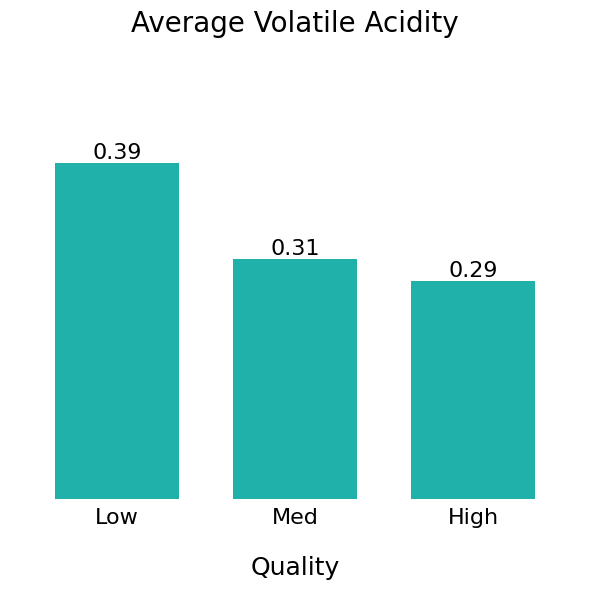

In [9]:
v_acidity_vs_quantity(train)

<font size="4"> **Hypothesis 3: Volatile Acidity Impact**</font>
   <font size="3"> 
   
   - *Question:* `Does the Volatile Acidity impact wine Quality?`
   </font>

H0: There is no statistically significant monotonic relationship between the quality of the wine and the Volatile Acidity.

Ha: There is a sstatistically significant monotonic relationship between the quality of the wine and the Volatile Acidity.

In [10]:
spearmanr_test(train,'volatile_acidity')

There is a statistically significant Spearman's rank correlation (p-value = 0.0000, corr = -0.2609).


<font size="5">We `REJECT` the null hypothesis.</font><br>
<font size="4">`There is a relationship` between the `Quality` of the wine and the `Alcohol` content.</font>

___
## #4 Cluster
___

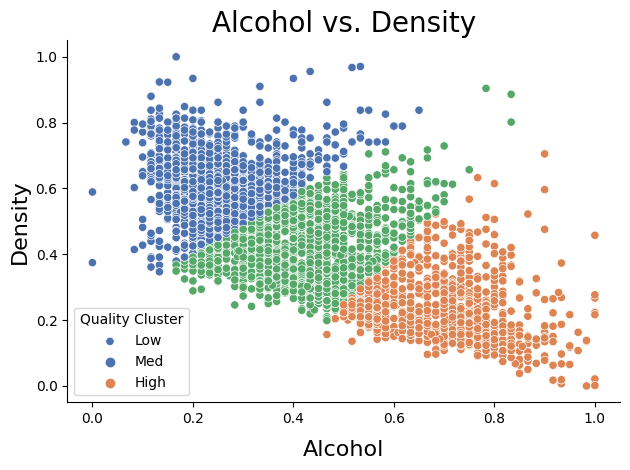

In [11]:
from vis import qual_cluster
qual_cluster(train)

<font size="4"> **Hypothesis 3: Cluster Impact**</font>
   <font size="3"> 
   
   - *Question:* `Does the new cluster feature impact wine Quality?`
   </font>

H0: There is no significant association between the quality of the wine and the Alcohol/Density Cluster.

Ha: There is a significant association between the quality of the wine and the Alcohol/Density Cluster.

In [12]:
from explore import perform_chi2_test

perform_chi2_test(train, 'alc_dens_cluster', 'quality_bins')

Chi-Squared Test of Independence:
Chi-Squared Statistic: 893.6341
P-value: 0.0000
Degrees of Freedom: 4
Expected Frequencies:
[[369.37815126 428.36377709 201.25807165]
 [715.83193277 830.14241486 390.02565237]
 [586.78991597 680.49380805 319.71627598]]


<font size="5">We `REJECT` the null hypothesis.</font><br>
<font size="4">`There is` a significant association between `Quality` of the wine and the `Alcohol` content.</font>

___
<font size="5">Exploration Summary</font><br>
___

We performed `Spearman's` test on: 

 - Alcohol
 - Density
 - Volatile Acidity
 
 `All indicated a relationship`


____
____
## MODELING
____
____

### Stablish a baseline

In [12]:
# Split df into train, validat and test dataframes 
# Split further into X and Y dataframes respectively 
df = acquire_wine()
train, val, test, X_train, y_train, X_val, y_val, X_test, y_test = data_pipeline(df)

In [13]:
# Calculate baseline using mean
eval_baseline(y_train)

0.8812

<font size="4">Baseline `0.88`</font>

In [14]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type_white
3761,9.9,0.490,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,9.400000,6,True
3740,7.7,0.280,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,9.600000,5,True
1359,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,6,False
1230,7.7,0.180,0.34,2.7,0.066,15.0,58.0,0.99470,3.37,0.78,11.800000,6,False
4751,7.6,0.250,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,13.100000,6,True


____
### ALPHA Feature Set
____

- Original 12 features
- Wine type feature
- Not scaled


In [18]:
rforest, alpha = train_model(RandomForestRegressor, X_train, y_train, X_val, y_val)

The train RMSE is 0.23.
The validate RMSE is 0.62.


In [19]:
xgbr, alpha = train_model(XGBRegressor, X_train, y_train, X_val, y_val, alpha)

The train RMSE is 0.25.
The validate RMSE is 0.64.


In [20]:
# Show Alpha Models results table
alpha

,Model,Train_RMSE,Val_RMSE
0,RandomForestRegressor,0.23,0.62
1,XGBRegressor,0.25,0.64


____
### BRAVO Feature Set
____

- Original 12 features
- Wine type feature
- MinMax scaled
